# 1.Read the column description and ensure you understand each attribute well

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

# 2.Study the data distribution in each attribute, share your findings. (5 points)

In [6]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# Observations from the data set
# ID - ID column is not of much significance, as it only represents customer ID's
# Age - Age column denotes age of customer, Average age is 45 years
#        - Since max age is 67 we can say there are outliers present in this column.
# Experience- It denotes the years of experience (as a professional) of a customer.
#              - The average experience is 20 years, the data is almost evenly distributed.
#              - The min value is -3 years, which is not correct since years cannot be in negative.   
#              - Some values like -1,-2 and -3 years experience are incorrect.
# Income - This column represents income of the customer
#           - Avg income is 64$ , while min is 8$ and max is 224$
#           - Since 75% of data is at 98$
#           - We can conclude many outliers are present in data
#           - Data is not evenly distributed
# ZIP Code - This column represents the ZIP code of customer's home address (not of much relevance now)
# Family - Represents number of family members in a customers family.
#          - The avg family size is 2 members
#          - Data is evenly distributed
# CCAvg   - Represents avg spending on credit cards per month
#           - The avg spending is 1.5$ , the max value is 10$
#           - Looking at the max and min values , there are many outliers present
#           - The data is not evenly distributed
# Education - Represents education of the customer
#             - Education Levels are 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#             - Avg education level is 2 denoting most customers are aleast graduate.
#             - Evenly distributed data
# Mortgage - Represents the value of house mortgage if any
#            - Avg mortgage is 0$ while 75% data is 101$
#            - Max value is 635$ , there are many ouliers present in the dataset
#            - Data is not evenly distributed
# Personal Loan - This column represent information about the customer, wether he has accepted the personal loan offered in the last campaign?
#                  - This represents the target column.
#                  - Avg is 0 , we can tell the most customers did not accept the loan offered
#                  - 75% of data is also 0 denoting very few customers i.e <25% or <1250 customers accepted the loan offer.
# Securities Account - Does the customer have a securities account with the bank?
#                       - Avg is 0 , we can tell the most customers do not have a securities account
#                       - 75% of data is 0 denoting very few customers i.e <25% or <1250 customers have a securities account
#
# CD Account- Does the customer have a certificate of deposit (CD) account with the bank?
#              - Avg is 0 , we can tell the most customers do not have a certificate of deposit (CD) account with bank.
#              - 75% of data is 0 denoting very few customers i.e <25% or <1250 customers have a certificate of deposit (CD) account with bank
# Online - Does the customer use internet banking facilities?
#           - Avg is 1 , we can tell the most customers do use internet banking facilities
#           - 75% of data is 1 denoting most customers use internet banking.
#           - Only i.e <25% or <1250 customers do not use internet banking facilities.
# CreditCard - Does the customer use a credit card issued by UniversalBank?
#               - Avg is 0 , we can tell the most customers do not use a credit card issued by UniversalBank
#               - 75% of data is 1 denoting only <25% or <1250 customers use a credit card issued by UniversalBank
#               

# 3.Get the target column distribution. Your comments

In [8]:
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256E3767748>]],
      dtype=object)

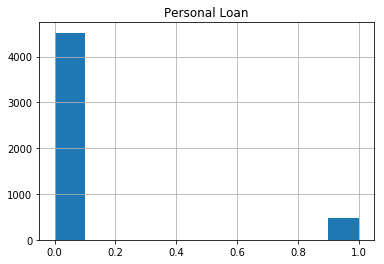

In [9]:
bank.hist(column='Personal Loan')

In [10]:
# From the above distribution we can conclude that :
# (a) 480 customers accepted the personal loan offered to them.
# (b) 4520 customers did not accept the personal laon offered.
# (c) On visual scrutiny, it can be apreciated that nearly 90% customers did not accept the personal loan offered.
# (d) Only less than 10% customers accepted the personal loan offered. 
# (e) Conversion rate from depositors to borrowers is very less i.e <10% . 

# Cleaning/processing the data before proceeding further

In [11]:
# Dropping columns with least significance
bank.drop(['ID', 'ZIP Code'] , axis=1 ,inplace=True)
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
# Removing outliers from whole dataset (although not preferred but can be checked)

In [13]:
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                    20.0
Experience             20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


In [14]:
bank_new = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]
bank_new.shape  # Rows with outliers are removed (around 1400 rows)

(3646, 12)

In [15]:
bank.shape #original dataframe

(5000, 12)

In [16]:
# Removing outliers in data from particular columns

In [17]:
# Drop all the columns with outliers in a new df(A)
A = bank.drop(['Income','CCAvg','Mortgage'], axis=1)

# Copy all the columns with outliers in a new df(B) 
B = bank[['Income','CCAvg','Mortgage']]

In [18]:
B.shape

(5000, 3)

In [19]:
B1 = B[~((B < (Q1 - 1.5 * IQR)) |(B > (Q3 + 1.5 * IQR))).any(axis=1)]
B1.shape # This is better since nearly 600 rows are removed compared to above where nearly 1400 rows were being removed

(4398, 3)

In [23]:
bank_new = pd.concat([A, B], axis = 1)
bank_new.sample(10)

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income,CCAvg,Mortgage
3201,28,3,4,1,0,0,0,0,0,81,0.2,0
1682,51,26,2,1,0,0,0,1,0,14,0.0,103
2483,44,18,4,1,0,1,0,0,0,68,2.9,0
2814,54,28,1,3,0,0,0,1,1,53,2.2,0
4630,46,21,1,2,0,0,0,0,0,92,0.2,0
4987,48,23,3,2,0,0,0,1,0,43,1.7,159
1841,42,17,1,2,0,0,0,1,1,91,0.1,199
108,33,7,1,3,0,0,0,1,0,32,0.6,166
72,44,20,1,1,0,0,0,0,1,130,5.0,0
1103,38,14,1,1,0,0,0,0,0,49,1.8,0


In [20]:
#Removing NaN from the dataframe by replacing with mean
bank_new['Income'].fillna((bank_new['Income'].mean()),inplace=True)
bank_new['CCAvg'].fillna((bank_new['CCAvg'].mean()),inplace=True)
bank_new['Mortgage'].fillna((bank_new['Mortgage'].mean()),inplace=True)

In [21]:
bank_new.sample(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1888,36,10,93,1,2.8,3,0,0,0,0,1,0
4834,49,23,70,1,0.3,1,217,0,0,0,0,0
2656,40,15,144,1,4.1,1,0,0,0,0,0,0
4634,42,17,29,1,0.6,3,0,0,0,0,1,0
4972,58,32,41,3,2.2,3,148,0,0,0,1,1
4475,43,18,59,3,0.8,3,91,0,0,0,1,0
2876,24,-2,80,2,1.6,3,238,0,0,0,0,0
3856,56,30,81,4,2.6,3,0,0,0,0,1,0
54,29,5,44,1,0.2,3,0,0,0,0,1,0
3300,62,38,43,1,1.9,2,0,0,0,0,1,0


In [22]:
bank_new.isnull().any() #All Nan are removed and replaced with mean value

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [23]:
bank_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3646.0,45.580636,11.491606,23.0,36.0,46.0,56.0,67.0
Experience,3646.0,20.318705,11.507589,-3.0,10.0,21.0,30.0,43.0
Income,3646.0,59.614646,34.045469,8.0,33.0,53.5,81.0,185.0
Family,3646.0,2.421832,1.161478,1.0,1.0,2.0,4.0,4.0
CCAvg,3646.0,1.446777,1.066806,0.0,0.6,1.3,2.1,5.2
Education,3646.0,1.906473,0.838561,1.0,1.0,2.0,3.0,3.0
Mortgage,3646.0,38.729567,67.982361,0.0,0.0,0.0,84.0,252.0
Personal Loan,3646.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Securities Account,3646.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CD Account,3646.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# 4.Split the data into training and test set in the ratio of 70:30 respectively

In [24]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing

# scale all the columns of the bank(dataFrame). This will produce a numpy array
bank_scaled = preprocessing.scale(bank)
bank_scaled

array([[-1.77441684, -1.66607847, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [25]:
#convert the numpy array back into a dataframe 

bank_scaled = pd.DataFrame(bank_scaled, columns=bank.columns)

#browse the contents of the dataframe. Check that all the values are now z scores

bank_scaled.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1.549632


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Copy all the independent/predictor variables into X dataframe. Since 'Personal Loan' is dependent variable drop it
X = bank.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
y = bank[['Personal Loan']]

In [28]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [29]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [30]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

# 6.Print the confusion matrix for all the above models (5 points)

In [31]:
# NOTE - Likelihood of a liability customer buying personal loans using different classification models including the confusion matrix of all the models is indicated below:-

In [32]:
# LOGISTIC REGRESSION MODEL

In [33]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LogisticRegression

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -0.40735712545130837
The coefficient for Experience is 0.4059285371145433
The coefficient for Income is 0.04915700472509551
The coefficient for Family is 0.6518585017415941
The coefficient for CCAvg is 0.1624094548475237
The coefficient for Education is 1.6559551407635293
The coefficient for Mortgage is 0.000794472279086515
The coefficient for Securities Account is -0.9057201904116156
The coefficient for CD Account is 3.2746884985321523
The coefficient for Online is -0.5829664066747879
The coefficient for CreditCard is -1.0130226699031675


In [35]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test) #Accuracy of the Logistic regression model  

0.9453333333333334

In [36]:
# The likelihood of a liability customer buying personal loans, i.e. accuracy of the Logistic Regression Model = 0.945 or 95%

In [37]:
prediction=regression_model.predict(X_test)  # another method for accuracy calculation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9453333333333334

In [38]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.952
0.9453333333333334


In [39]:
# predict Personal loan conversion (from depositor to borrower) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

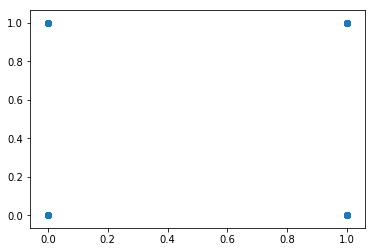

In [40]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [41]:
# From the above plot, the behaviour exhibited by logistic model on Personal Loan can be appreciated.
# Only 0-No or 1-Yes values are shown, thereby proving discrete nature of the model.

In [42]:
# Final Confusion Matrix for "LOGISTIC REGRESSION MODEL" - part of Question 6

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1333   18]
 [  64   85]]


In [44]:
# KNN MODEL

In [45]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
y_pred = classifier.predict(X_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
type(y_test)

pandas.core.frame.DataFrame

In [48]:
y_pred1=pd.DataFrame(y_pred)
type(y_pred1)

pandas.core.frame.DataFrame

In [49]:
df_c = pd.concat([y_pred1.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
df_c.head()

,0,Personal Loan
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [50]:
# Printing initial Confusion Matrix for "KNN MODEL" - part of Question 6

In [51]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1306   45]
 [  94   55]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.55      0.37      0.44       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.74      0.67      0.70      1500
weighted avg       0.89      0.91      0.90      1500



In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9073333333333333

In [53]:
# The likelihood of a liability customer buying personal loans, i.e. accuracy of the K-NN Model = 0.907 or 91%

In [54]:
y_test_np=np.asarray(y_test)
print(type(y_test_np))

<class 'numpy.ndarray'>


In [55]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #iter_acc=accuracy_score(y_test,pred_i)
    #iter_err=100.0-(iter_acc.astype(float))
    #iter_err=np.sum(y_test == pred_i)
    error.append(np.mean(pred_i != y_test_np))

In [56]:
error

[0.1661111111111111,
 0.12871555555555556,
 0.1559608888888889,
 0.1276471111111111,
 0.15275555555555556,
 0.1319208888888889,
 0.14848177777777777,
 0.1324551111111111,
 0.14527644444444446,
 0.13085244444444444,
 0.144208,
 0.12871555555555556,
 0.14260533333333333,
 0.13138666666666668,
 0.14046844444444445,
 0.13031822222222222,
 0.1394,
 0.13298933333333332,
 0.1394,
 0.13352355555555556,
 0.13833155555555557,
 0.13138666666666668,
 0.1372631111111111,
 0.13085244444444444,
 0.13886577777777778,
 0.12871555555555556,
 0.13512622222222223,
 0.12818133333333334,
 0.13298933333333332,
 0.12604444444444443,
 0.1319208888888889,
 0.12444177777777778,
 0.12871555555555556,
 0.12337333333333333,
 0.12818133333333334,
 0.12283911111111111,
 0.12657866666666667,
 0.12177066666666667,
 0.12604444444444443]

Text(0, 0.5, 'Mean Error')

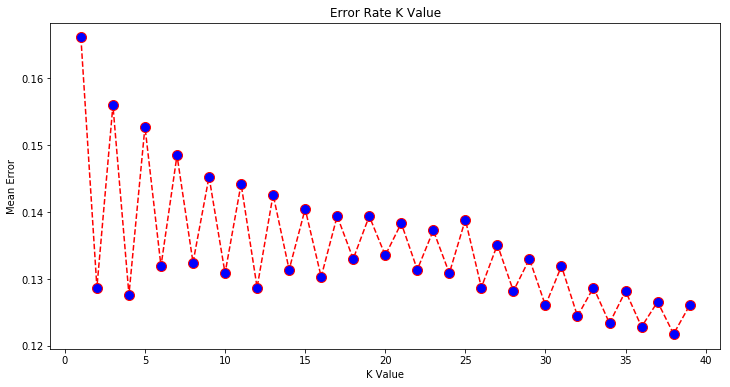

In [57]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [58]:
classifier1 = KNeighborsClassifier(n_neighbors=38)  #Valueof error is least (0.12177066666666667) at K value=38
classifier1.fit(X_train, y_train) 
y_pred1 = classifier1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# Printing final confusion matrix for KNN Model - part of Question 6

In [60]:
print(confusion_matrix(y_test, y_pred1))  
print(classification_report(y_test, y_pred1))  
print(accuracy_score(y_test, y_pred1))

[[1334   17]
 [ 124   25]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.60      0.17      0.26       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.76      0.58      0.61      1500
weighted avg       0.88      0.91      0.88      1500

0.906


In [61]:
# NAIVE BAYES MODEL

In [62]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [63]:
y_pred_GNB=clf_GNB.predict(X_test)
y_pred_GNB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.8746666666666667

In [65]:
# The likelihood of a liability customer buying personal loans, i.e. accuracy of the NAIVE BAYES MODEL = 0.874 or 87%

In [66]:
# Printing final confusion matrix for NAIVE BAYES MODEL - Part of Question 6

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[1228  123]
 [  65   84]]


# 7.Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [68]:
# LOGISTIC REGRESSION MODEL

In logistic model's confusion matrix [1333   18]
                                     [64     85]
We can see that 1333(true positives) + 85(true negatives) = 1418, which is the correct number of predictions by the model
So, the model predicted the correct outcomes by nearly 95% .
Hence, the incorrect outcomes were 5%

In [69]:
# KNN MODEL

In K-NN model's confusion matrix [1334   17]
                                 [124    25]
We can see that 1334 (true positives) + 25 (true negatives) = 1359, which is the correct number of predictions by the model
So, the model predicted the correct outcomes by nearly 91% .
Hence, the incorrect outcomes were 9%

In [70]:
# Naive Bayees Model

In Naïve Bayes model's confusion matrix [1228   123]
                                        [65      84]
We can see that 1333 (true positives) + 85(true negatives) = 1312 which is the correct number of predictions by the model
So, the model predicted the correct outcomes by nearly 87% .
Hence , the incorrect outcomes were 13%

# Conclusion

# (A)  Logistic model is the best in this case, with an accuracy of 95%.

# (B)  Theoretically, Logistic model is best suited for scenarios with binary 
#    target like 0 or 1  that is Yes or No .

# (C)  Practically, the same can be seen, since we had to predict the likelihood 
#    of a liability customer buying personal loans i.e Yes(1) or No(0).

#  (D) Logistic model works well for binary values and would be the best model #    for the present case.